# Step 6: Train a Demand Prediction Model

## 6.1 Train a Linear Regression Model

In [ ]:
# 1. Converting column to a new Series to fully detach from category type
df_cleaned['renewable_energy_source'] = df_cleaned['renewable_energy_source'].astype(str).copy()

# 2. Ensurign 'Yes' and 'No' are replaced properly
df_cleaned['renewable_energy_source'] = df_cleaned['renewable_energy_source'].map({'Yes': 1, 'No': 0})

# 3. Converting to numeric, forcing any unexpected values to NaN
df_cleaned['renewable_energy_source'] = pd.to_numeric(df_cleaned['renewable_energy_source'], errors='coerce')

# 4. Filling NaN values and converting to int
df_cleaned['renewable_energy_source'] = df_cleaned['renewable_energy_source'].fillna(0).astype(int)

# Final Check
print(df_cleaned['renewable_energy_source'].dtype)  # Should be int64
print(df_cleaned['renewable_energy_source'].unique())  # Should be [0, 1]


int64
[1 0]


In [ ]:
# Ensuring all columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Filingl any NaN values that might have been introduced
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Trainning a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluating the model
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression Model Performance:")
print(f"R² Score: {r2_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")



Linear Regression Model Performance:
R² Score: -0.0080
Mean Absolute Error (MAE): 0.2523
Root Mean Squared Error (RMSE): 0.2928


## 6.2 Train an XGBoost Model

In [ ]:
from xgboost import XGBRegressor

# Trainning an XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\nXGBoost Model Performance:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")



XGBoost Model Performance:
R² Score: -0.1421
Mean Absolute Error (MAE): 0.2658
Root Mean Squared Error (RMSE): 0.3117


## 6.3 Train a Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Trainning a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\nRandom Forest Model Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")



Random Forest Model Performance:
R² Score: -0.1029
Mean Absolute Error (MAE): 0.2615
Root Mean Squared Error (RMSE): 0.3063


## 6.4 Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Performing GridSearchCV
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predicting on test set
y_pred_best = best_model.predict(X_test)

# Evaluating best model
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("\nBest XGBoost Model (After Hyperparameter Tuning):")
print(f"Best Parameters: {best_params}")
print(f"R² Score: {r2_best:.4f}")
print(f"Mean Absolute Error (MAE): {mae_best:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.4f}")



Best XGBoost Model (After Hyperparameter Tuning):
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
R² Score: -0.0034
Mean Absolute Error (MAE): 0.2520
Root Mean Squared Error (RMSE): 0.2922


##  Demand-Based Clustering & Classification

## 6.5 Create Demand-Based Clusters Using K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting demand-related features
demand_features = df_cleaned[[
    "usage_stats_avg_users_per_day",
    "cost_usd_per_kwh",
    "distance_to_city_km",
    "parking_spots"
]]

# Normalizing features
scaler = StandardScaler()
demand_features_scaled = scaler.fit_transform(demand_features)

# Fitting K-Means clustering (15 demand clusters)
kmeans_demand = KMeans(n_clusters=15, random_state=42, n_init=10)
df_cleaned["demand_cluster"] = kmeans_demand.fit_predict(demand_features_scaled)

# Check the distribution of demand clusters
print("Demand Cluster Distribution:")
print(df_cleaned["demand_cluster"].value_counts())


Demand Cluster Distribution:
demand_cluster
11    288
5     277
1     274
0     270
14    261
7     255
3     255
13    251
8     249
12    247
2     246
10    229
4     228
9     225
6     215
Name: count, dtype: int64


## 6.6 Train a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Defining features for classification
selected_features = [
    "cost_usd_per_kwh",
    "distance_to_city_km",
    "parking_spots",
    "charging_capacity_kw",
    "reviews_rating"
]

# Features (X) & Target (y)
X_class = df_cleaned[selected_features]
y_class = df_cleaned["demand_cluster"]

# Train-Test Split (80:20)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Training Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = rf_classifier.predict(X_test_class)

# Model Evaluation
accuracy = accuracy_score(y_test_class, y_pred_class)
print("\nRandom Forest Classification Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))



Random Forest Classification Performance:
Accuracy: 0.5133

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.82      0.65        56
           1       0.49      0.50      0.50        52
           2       0.56      0.57      0.57        49
           3       0.51      0.55      0.53        47
           4       0.61      0.48      0.54        52
           5       0.42      0.46      0.44        48
           6       0.35      0.34      0.35        41
           7       0.39      0.18      0.24        51
           8       0.46      0.62      0.53        42
           9       0.43      0.49      0.46        37
          10       0.44      0.39      0.41        49
          11       0.63      0.86      0.73        58
          12       0.43      0.45      0.44        47
          13       0.68      0.41      0.51        68
          14       0.59      0.51      0.55        57

    accuracy                           0.51      

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Evaluate RF Classification Model

# Calculating R^2 score (since we are classifying demand clusters, we treat them as ordinal values)
r2_class = r2_score(y_test_class, y_pred_class)

# Calculating Scores
mse_class = mean_squared_error(y_test_class, y_pred_class)
mae_class = mean_absolute_error(y_test_class, y_pred_class)
rmse_class = np.sqrt(mse_class)

# Display results
print("\nRF-Based Demand Classification Model Performance:")
print(f"R^2 Score: {r2_class:.4f}")
print(f"Mean Squared Error (MSE): {mse_class:.2f}")
print(f"Mean Absolute Error (MAE): {mae_class:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_class:.2f}")



RF-Based Demand Classification Model Performance:
R^2 Score: 0.3314
Mean Squared Error (MSE): 13.53
Mean Absolute Error (MAE): 2.12
Root Mean Squared Error (RMSE): 3.68


## 6.7 Analyze Demand Clusters

In [ ]:
# Defining the mapping based on the provided data
cluster_to_city = {
    0: "Chicago",
    1: "Seoul",
    2: "Cape Town",
    3: "Berlin",
    4: "Bangkok",
    5: "Mexico City",
    6: "São Paulo",
    7: "Sydney",
    8: "Los Angeles",
    9: "Mumbai",
    10: "Moscow",
    11: "Dubai",
    12: "Beijing",
    13: "Toronto",
    14: "San Francisco"
}

# Countting stations per demand cluster
demand_cluster_counts = df_cleaned["demand_cluster"].value_counts().reset_index()
demand_cluster_counts.columns = ["demand_cluster", "station_count"]
demand_cluster_counts["city"] = demand_cluster_counts["demand_cluster"].map(cluster_to_city)

# Displaying results
demand_cluster_counts


,demand_cluster,station_count,city
0,11,288,Dubai
1,5,277,Mexico City
2,1,274,Seoul
3,0,270,Chicago
4,14,261,San Francisco
5,7,255,Sydney
6,3,255,Berlin
7,13,251,Toronto
8,8,249,Los Angeles
9,12,247,Beijing


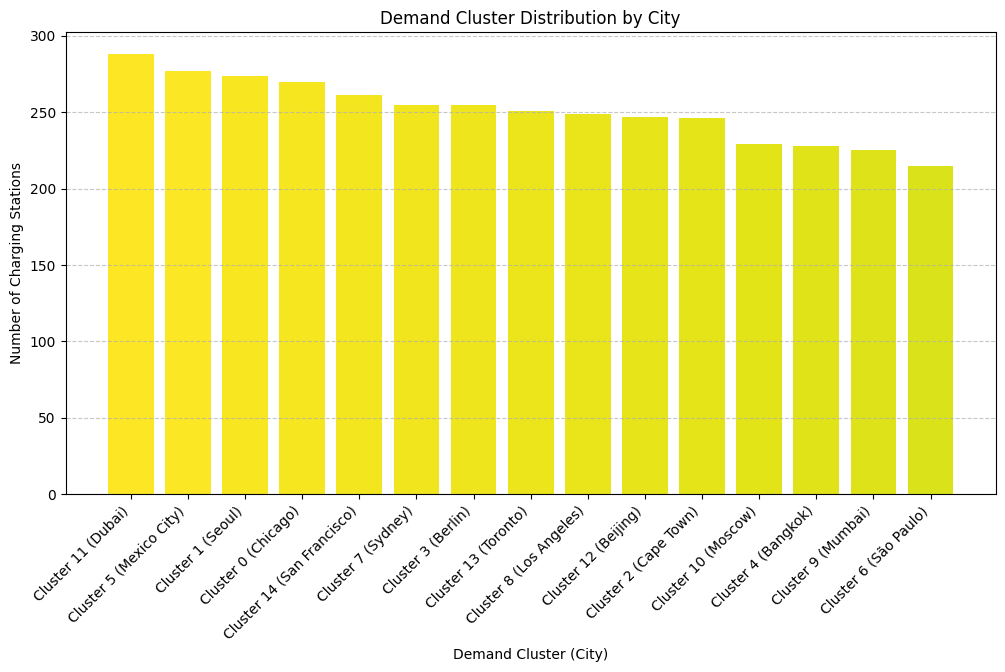

In [ ]:
import matplotlib.pyplot as plt

# Ensuring the data is sorted for correct visualization
demand_cluster_counts = demand_cluster_counts.sort_values(by="station_count", ascending=False)

# Creating formatted labels for the x-axis
demand_cluster_counts["label"] = demand_cluster_counts.apply(lambda row: f"Cluster {row['demand_cluster']} ({row['city']})", axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(demand_cluster_counts["label"], demand_cluster_counts["station_count"], color=plt.cm.viridis_r(range(len(demand_cluster_counts))))

plt.xticks(rotation=45, ha="right")
plt.xlabel("Demand Cluster (City)")
plt.ylabel("Number of Charging Stations")
plt.title("Demand Cluster Distribution by City")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## 6.8 Train an XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Trainn9gn an XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
xgb_classifier.fit(X_train_class, y_train_class)

# Predictions
y_pred_xgb = xgb_classifier.predict(X_test_class)

# Model Evaluation
accuracy_xgb = accuracy_score(y_test_class, y_pred_xgb)
print("\nXGBoost Classification Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_xgb))



XGBoost Classification Performance:
Accuracy: 0.5239

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.82      0.69        56
           1       0.55      0.58      0.56        52
           2       0.52      0.47      0.49        49
           3       0.49      0.60      0.54        47
           4       0.51      0.35      0.41        52
           5       0.34      0.40      0.37        48
           6       0.42      0.41      0.42        41
           7       0.52      0.29      0.38        51
           8       0.50      0.69      0.58        42
           9       0.45      0.57      0.50        37
          10       0.47      0.37      0.41        49
          11       0.63      0.79      0.70        58
          12       0.44      0.53      0.48        47
          13       0.77      0.44      0.56        68
          14       0.62      0.53      0.57        57

    accuracy                           0.52       754
 

## 6.9 Tuning XGBoost using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definiung hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Testing different values
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Performming Grid SearchCV
grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_class, y_train_class)

# Getting the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Trainning the best model
best_xgb_model = XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train_class, y_train_class)

# Evaluating the tuned model
y_pred_best_xgb = best_xgb_model.predict(X_test_class)
accuracy_best_xgb = accuracy_score(y_test_class, y_pred_best_xgb)

print(f"\nTuned XGBoost Accuracy: {accuracy_best_xgb:.4f}")


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Tuned XGBoost Accuracy: 0.4854
